# Project: Investigate a Dataset- Medical Appointment No Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### More about the dataset
##### Dataset link: https://www.kaggle.com/datasets/joniarroba/noshowappointments

###### Dataset Description:
The dataset collects more than 100k medical appointment information in Brazil and focuses on whether patients show up for their appointment or not. This project examines the Medical Appointment No Shows dataset, which contains historical data from more than more than 110k appointments at various medical facilities in Brazil for more than 60k patients. A set of characteristics about the patient are:

##### Data Dictionary:

>1. PatientId: Identification of a patient
>2. AppointmentID: Identification of each appointment
>3. Gender: (Male or Female)
>4. Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.
>5. Appointment Day: The day someone called or registered the appointment, this is before appointment of course.
>6. Age: How old is the patient.
>7. Neighbourhood: Where the appointment takes place. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
>8.Scholarship: (Yes or No)
>9. Hipertension: (Yes or No)
>10. Diabetes: (Yes or No)
>11. Alcoholism: (Yes or No)
>12. Handcap: (Yes or No)
>13. SMS_received: (1 or more messages sent to the patient)
>14. No-show: (True or False).

### Asking some Questions for analysis
>. Is there a correlation between the attributes and the patient's appearance?

>1. ###### Do Age, SMS_received, gender, and scholarship affect the patient's appearance?
>2. ###### Does waiting time have an effect on appearing for appointments?


In [479]:
# import of the packages that are needed in the project.
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [480]:
# load Dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [481]:
# There are 110527 rows and  14 columns
df.shape

(110527, 14)

In [482]:
# Varibles dtypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [483]:
# some Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [484]:
# some description about Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [485]:
# cheking the last 3 rows
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Data Cleaning 
> In this section I will delete unnecessary features(like PatientId and PatientId  or duplicate rows ),replace some NaN Value, delete ages with values less than 0, create a new feature (waiting time) and convert the values of some features

In [486]:
# Check if there are Missing Value --> No Missing Value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [487]:
# Check if there are duplicate Values --> No duplicate Values
df.duplicated().sum()
# df.drop_duplicates(inplace = True)

0

In [489]:
# Dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [490]:
# Drope unnecessary features
df = df.drop(["PatientId","AppointmentID"], axis = 1)

In [491]:
# checking if selected feature are droped 
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [492]:
# Change Date Format(Schedule and Appointment Day features) 
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"] )

In [493]:
# Check Changes 
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [494]:
# the times were considered only for registration but not for appointments, so Dopping  them
df['ScheduledDay'] =df['ScheduledDay'].dt.date
df['AppointmentDay'] =df['AppointmentDay'].dt.date

In [495]:
# Check Changes 
df.head(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [496]:
# ScheduledDay muss be <= AppointmentDay
(df['ScheduledDay'] <=df['AppointmentDay']).value_counts()

True     110522
False         5
dtype: int64

In [497]:
# The Value for  ScheduledDay > AppointmentDay muss be deleted 
df = df[df.ScheduledDay <= df.AppointmentDay]
df.head(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [498]:
# Creating a new feature with the Name "waiting time", that represents the difference between appointment and scheduled day.

df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [499]:
#Check for Changes 
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0


In [500]:
#Checking the the New Variable
df.Waiting_time.value_counts()

0      38563
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: Waiting_time, Length: 129, dtype: int64

In [502]:
df['Waiting_time'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

In [503]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-0.001, 4.0, 10.18, 15.0, 179.0]  # Fill in this list with five values you just found

In [504]:
# Labels for the four acidity level groups
bin_names = ['Short_Term', 'Mid_Term', 'Lange_Term', 'Very_lange_Term']  # Name each Waiting_time level category

In [505]:
# Creates Waiting_time column
df['Waiting_time_levels'] = pd.cut(df['Waiting_time'], bin_edges, labels=bin_names)

In [506]:
# Checks for successful creation of this column
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_time_levels
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Short_Term
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Short_Term
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Short_Term


In [507]:
df.Waiting_time_levels.value_counts()

Short_Term         58528
Very_lange_Term    26246
Mid_Term           17548
Lange_Term          8200
Name: Waiting_time_levels, dtype: int64

In [508]:
# Drope unnecessary features: New Feature was already Created so no needed for the Features (ScheduledDay,AppointmentDay,)
df = df.drop(["ScheduledDay","AppointmentDay"], axis = 1)

In [509]:
# check Changes
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_time_levels
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Short_Term
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Short_Term
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Short_Term


In [510]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [511]:
df.Neighbourhood.describe()

count             110522
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

In [512]:
df.Neighbourhood.nunique()
# No need to creat Categories because there are many Values 

81

In [513]:
# Some Infos about Ages 
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [514]:
# Age should be greater than 0
df = df[df.Age > 0]

In [515]:
# Check Changes 
df.Age.describe()

count    106982.000000
mean         38.316315
std          22.466023
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [516]:
# Categorical to Numerical Value 
cleanup_num = {"F": 0, "M":1}
df.replace(cleanup_num, inplace = True)
# Check Changes
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_time_levels
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Short_Term
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Short_Term


In [517]:
# Check Changes 
df.Gender.value_counts()

0    70115
1    36867
Name: Gender, dtype: int64

In [518]:
# Scholarship muss be 1 or 0
df.Age.nunique()

102

In [519]:
# Scholarship muss be 1 or 0
df.Scholarship.value_counts()

0    96173
1    10809
Name: Scholarship, dtype: int64

In [520]:
# Hipertension muss be 1 or 0
df.Hipertension.value_counts()

0    85181
1    21801
Name: Hipertension, dtype: int64

In [521]:
# Diabetes muss be 1 or 0
df.Diabetes.value_counts()

0    99039
1     7943
Name: Diabetes, dtype: int64

In [522]:
# Alcoholism muss be 1 or 0
df.Alcoholism.value_counts()

0    103622
1      3360
Name: Alcoholism, dtype: int64

In [523]:
# rename Handcap column to handicap
df.rename(columns={'Handcap':'handicap'}, inplace=True)

In [524]:
# Handcap muss be 1 or 0  df.Handcap.nunique()
df.handicap.value_counts()

0    104744
1      2039
2       183
3        13
4         3
Name: handicap, dtype: int64

In [525]:
# drop Value that are grater than 1
df = df[df.handicap <2]

In [526]:
df.handicap.value_counts()

0    104744
1      2039
Name: handicap, dtype: int64

In [527]:
# SMS_received muss be 1 or more messages
df.SMS_received.value_counts()

0    72245
1    34538
Name: SMS_received, dtype: int64

In [528]:
# Categorical to Numerical Value for No-show
cleanup_num2 = {"No": 0, "Yes":1}
df.replace(cleanup_num2, inplace = True)
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,handicap,SMS_received,No-show,Waiting_time,Waiting_time_levels
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Short_Term
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Short_Term


In [529]:
# Check Changes
df["No-show"].value_counts()

0    85149
1    21634
Name: No-show, dtype: int64

In [530]:
# Create a fuction to change some columns Name
def rename_columns(df,col_Name):
    df.rename(columns=col_Name,inplace=True)

In [531]:
# columns bevor Change
df.columns.values

array(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'handicap', 'SMS_received', 'No-show',
       'Waiting_time', 'Waiting_time_levels'], dtype=object)

In [532]:
#Renaming
rename_columns(df,lambda x:x.lower().replace('-','_'))

In [533]:
# Check Changes 
df.columns.values

array(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'waiting_time', 'waiting_time_levels'], dtype=object)

In [534]:
df.head(2)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,waiting_time_levels
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Short_Term
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Short_Term


In [535]:
df.to_csv('Cleaned_Dataset.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: This section will contain a discussion of the research questions and statistical analysis.

# Let's discover first our Dataset
#### how are the patients distributed, according to appointment appearance ?


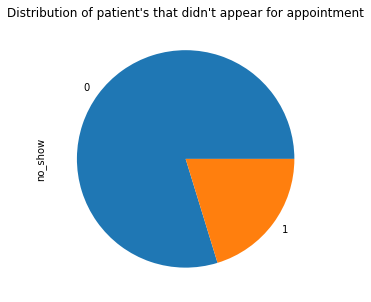

In [536]:
# No_show distribution
df.no_show.value_counts().plot(kind ="pie",title='Distribution of patient\'s that didn\'t appear for appointment' ,figsize =(5,5));

> More than 75% have made their appointment

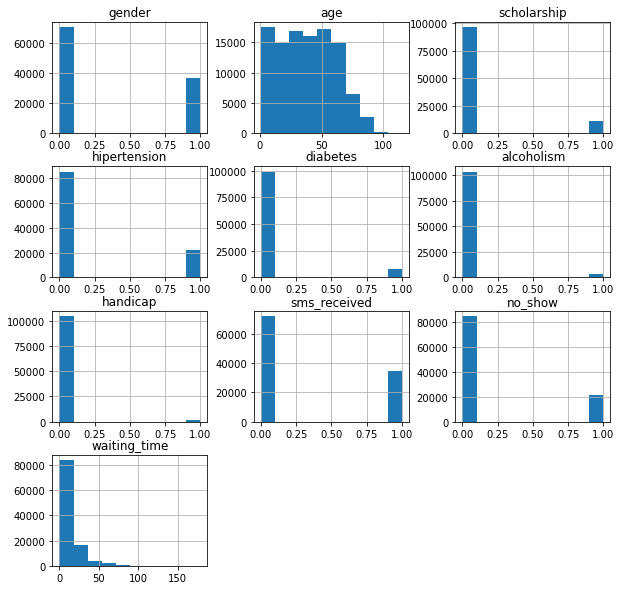

In [537]:
# explore data
df.hist(figsize =(10, 10));

### Research Question 1: Do Age, SMS_received, gender, and scholarship affect the patient's appearance?

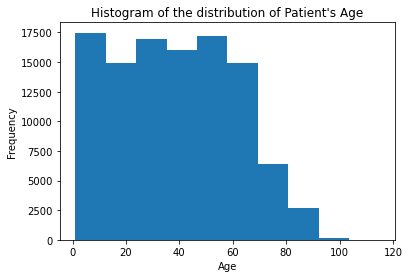

In [539]:
# Age distribution
plt.title("Histogram of the distribution of Patient\'s Age")
plt.xlabel("Age")
df.age.plot.hist();

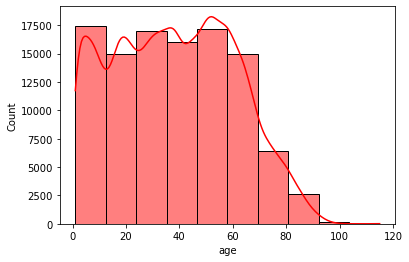

In [549]:
sns.histplot(df.age, bins = 10 , kde = True , color = "red");

>. The average of age is 37 and the oldest patient is 115.

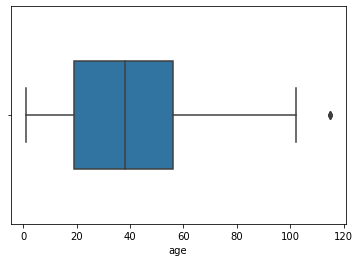

In [541]:
#df.age.plot.box();
sns.boxplot(x = df.age, width = 0.5);

>. Age have Outliers

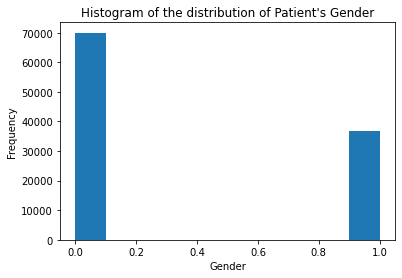

In [553]:
#Gender distribution
plt.title("Histogram of the distribution of Patient\'s Gender")
plt.xlabel("Gender")
df.gender.plot.hist();

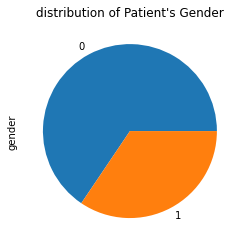

In [554]:
# Gender distribution
df.gender.value_counts().plot(kind ="pie",title ="distribution of Patient\'s Gender", figsize =(4,4));

>.There are more women than men, probably women care more about their health than men do

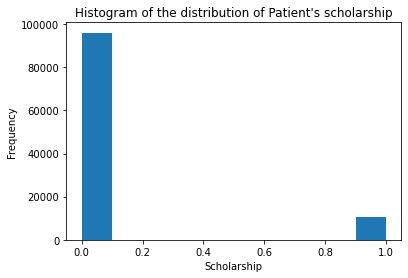

In [555]:
#Scholarship distribution
plt.title("Histogram of the distribution of Patient\'s scholarship")
plt.xlabel("Scholarship")
df.scholarship.plot.hist();

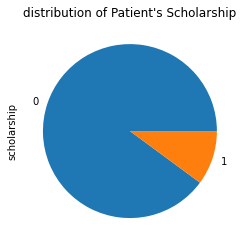

In [545]:
# scholarship distribution
df.scholarship.value_counts().plot(kind ="pie",title ="distribution of Patient\'s Scholarship", figsize =(4,4));

>. Only few people have scholarship, maybe it is a reason not to go to the appointment, because they can not pay for it.

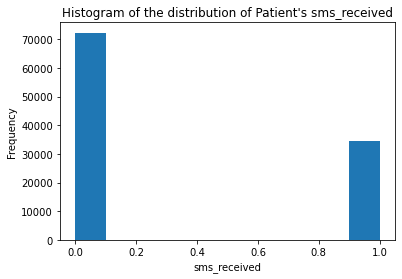

In [556]:
#sms_received distribution
plt.title("Histogram of the distribution of Patient\'s sms_received")
plt.xlabel("sms_received")
df.sms_received.plot.hist();

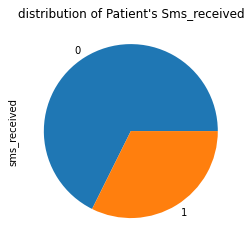

In [564]:
# sms_received distribution
df.sms_received.value_counts().plot(kind ="pie",title ="distribution of Patient\'s Sms_received", figsize =(4,4));

### Limitation:
>. Less than half have received an SMS or more, but this may be due to the fact that the patients who have made the appointment for the same day and visited the doctor, have not counted, because the remeinder usually happened one day before appointment agreement. 

In [565]:
# Let Try with the Correlation Matrix to see the Correlation Between Variables

In [559]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

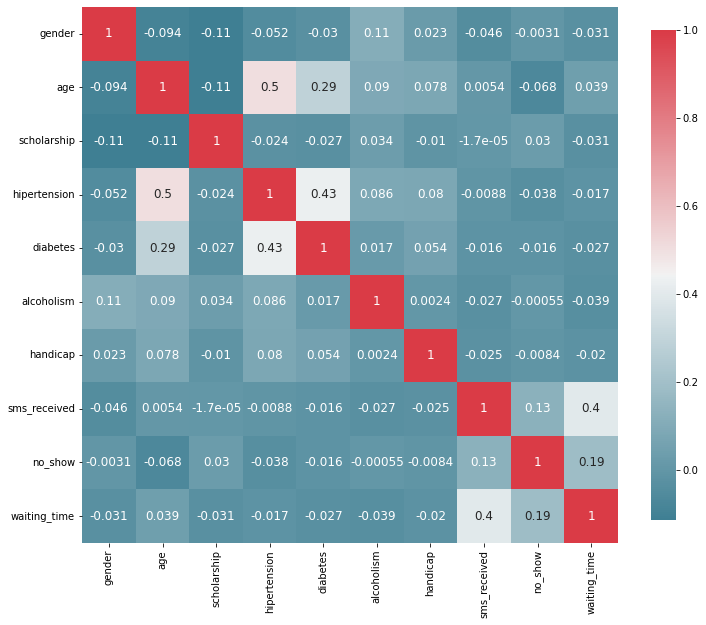

In [560]:
plot_correlation_map(df)

###### Observation
1. There is a correlation between "No_Show" and "Waiting_Time" or "Sms_Receive".  
2. There is also a correlation between diabetes/hypertension and age, meaning that as people get older, they are more likely to get diabetes/hypertension.
3. There is also a relationship between diabetes and  getting hypertension.
4. Like described, there is also a correlation between the SMS-recived and the waiting time.

### Research Question 2 : Does waiting time have an effect on appearing for appointments?

In [566]:
data=df.groupby('no_show')['waiting_time'].mean().round()
data

no_show
0     9.0
1    16.0
Name: waiting_time, dtype: float64

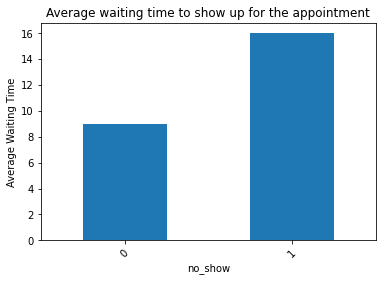

In [567]:
#Average waiting time to show up for the appointment
plt.title("Average waiting time to show up for the appointment")
plt.xlabel("no Show")
plt.ylabel("Average Waiting Time")

data.plot.bar(rot = 45);

###### Observation
The bar chart shown above illustrates that patients who keep an appointment have a shorter wait time than patients who do not show up. Patients who did not appear have an average of 16 days waiting time before the appointment, while patients who did appear have an average of 8 days waiting time before the appointment.

Therefore, I think that we can conclude that the waiting time has an impact on whether a patient appears for an appointment or not.

<a id='conclusions'></a>
## Conclusions

>1. The number of patients who attended a medical appointment is greater than the number of patients who did not make an appointment.

>2. Sms_ sms_received as Remeinder es has made sure that patients do not miss their appointments. 

>3. the waiting time has an influence on whether a patient comes to a doctor's appointment or not

## Limititions.

##### Value:
>1. Age < 0 Negativ Value
>2. Age have outliers
>3. The value of the received SMS is not always correct, because if the waiting time = 0, most probably the SMS will not be sent.

##### Difference in Values:
>1. the number of females is great than males
>2.There is a difference in age for different age stages